In [79]:
import pandas as pd
import missingno as msno
import plotly.express as px
import re

In [80]:
dados = pd.read_csv('C:/Users/rafae/Desenvolvimento/Faculdade/Web Mining/SeleniumAulas/realEstateInvestmentsTrustScraper/basesOriginais/reits.csv')

In [81]:
dados.head()

,Unnamed: 0,codigo,setor,precoAtual,liquidezDiaria,dividendo,dividendYield,dividendYieldAnual,variacaoPreco,pvp,vacanciaFisica,vacanciaFinanceira
0,0,AAZQ11,NaN,"R$ 9,64",55865.0,"R$ 0,13","1,35%","2,90%","-0,72%","1,00",NaN,NaN
1,1,ABCP11,Shoppings,"R$ 64,85",798.0,"R$ 0,50","0,77%","1,53%","-2,90%","0,71","7,50%",NaN
2,2,AFHI11,Títulos e Val. Mob.,"R$ 92,21",7009.0,"R$ 1,06","1,12%","2,24%","0,57%","0,97",NaN,NaN
3,3,AGRX11,NaN,"R$ 10,69",10183.0,"R$ 0,18","1,68%","3,24%","4,29%",NaN,NaN,NaN
4,4,AIEC11,Lajes Corporativas,"R$ 60,64",3907.0,"R$ 0,75","1,22%","1,49%","-7,46%","0,64","0,00%",NaN


In [82]:
dados.columns

Index(['Unnamed: 0', 'codigo', 'setor', 'precoAtual', 'liquidezDiaria',
       'dividendo', 'dividendYield', 'dividendYieldAnual', 'variacaoPreco',
       'pvp', 'vacanciaFisica', 'vacanciaFinanceira'],
      dtype='object')

# Tratamento de index e duplicados.

In [83]:
dados.shape

(328, 12)

In [84]:
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(328, 12)

In [85]:
dados.drop(['Unnamed: 0'],axis=1, inplace=True)

# Não houve a necessidade de retirar/modificar colunas, pois já foi pego as colunas certas do site na hora do scrapping.

#Tratamento de dados para retirar os caracteres especiais

In [86]:
alteredColumns = ['precoAtual']
for column in alteredColumns:
    dados[column] = dados[column].apply(lambda item: item if pd.isna(item) else float(re.match(r'^R$\s(\d{1,3}(.\d{3})|\d+)(,\d{2})?\s*$', item).group(1).replace('.', '').replace(',', '.')))
    

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
dados.head()

,codigo,setor,precoAtual,liquidezDiaria,dividendo,dividendYield,dividendYieldAnual,variacaoPreco,pvp,vacanciaFisica,vacanciaFinanceira
0,AAZQ11,NaN,964.0,55865.0,"R$ 0,13","1,35%","2,90%","-0,72%","1,00",NaN,NaN
1,ABCP11,Shoppings,6485.0,798.0,"R$ 0,50","0,77%","1,53%","-2,90%","0,71","7,50%",NaN
2,AFHI11,Títulos e Val. Mob.,9221.0,7009.0,"R$ 1,06","1,12%","2,24%","0,57%","0,97",NaN,NaN
3,AGRX11,NaN,1069.0,10183.0,"R$ 0,18","1,68%","3,24%","4,29%",NaN,NaN,NaN
4,AIEC11,Lajes Corporativas,6064.0,3907.0,"R$ 0,75","1,22%","1,49%","-7,46%","0,64","0,00%",NaN


# Tratamento de dados missing

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo              328 non-null    object 
 1   setor               309 non-null    object 
 2   precoAtual          319 non-null    float64
 3   liquidezDiaria      319 non-null    float64
 4   dividendo           328 non-null    object 
 5   dividendYield       323 non-null    object 
 6   dividendYieldAnual  291 non-null    object 
 7   variacaoPreco       323 non-null    object 
 8   pvp                 300 non-null    object 
 9   vacanciaFisica      126 non-null    object 
 10  vacanciaFinanceira  30 non-null     object 
dtypes: float64(2), object(9)
memory usage: 30.8+ KB


In [ ]:
print('Valoress NULL Da Base De Dados:\n')
print(dados.isnull().sum())

Valoress NULL Da Base De Dados:

codigo                  0
setor                  19
precoAtual              9
liquidezDiaria          9
dividendo               0
dividendYield           5
dividendYieldAnual     37
variacaoPreco           5
pvp                    28
vacanciaFisica        202
vacanciaFinanceira    298
dtype: int64


In [ ]:
print('\nValoress NAN Da Base De Dados:\n')
print(dados.isna().sum())


Valoress NAN Da Base De Dados:

codigo                  0
setor                  19
precoAtual              9
liquidezDiaria          9
dividendo               0
dividendYield           5
dividendYieldAnual     37
variacaoPreco           5
pvp                    28
vacanciaFisica        202
vacanciaFinanceira    298
dtype: int64


<Axes: >

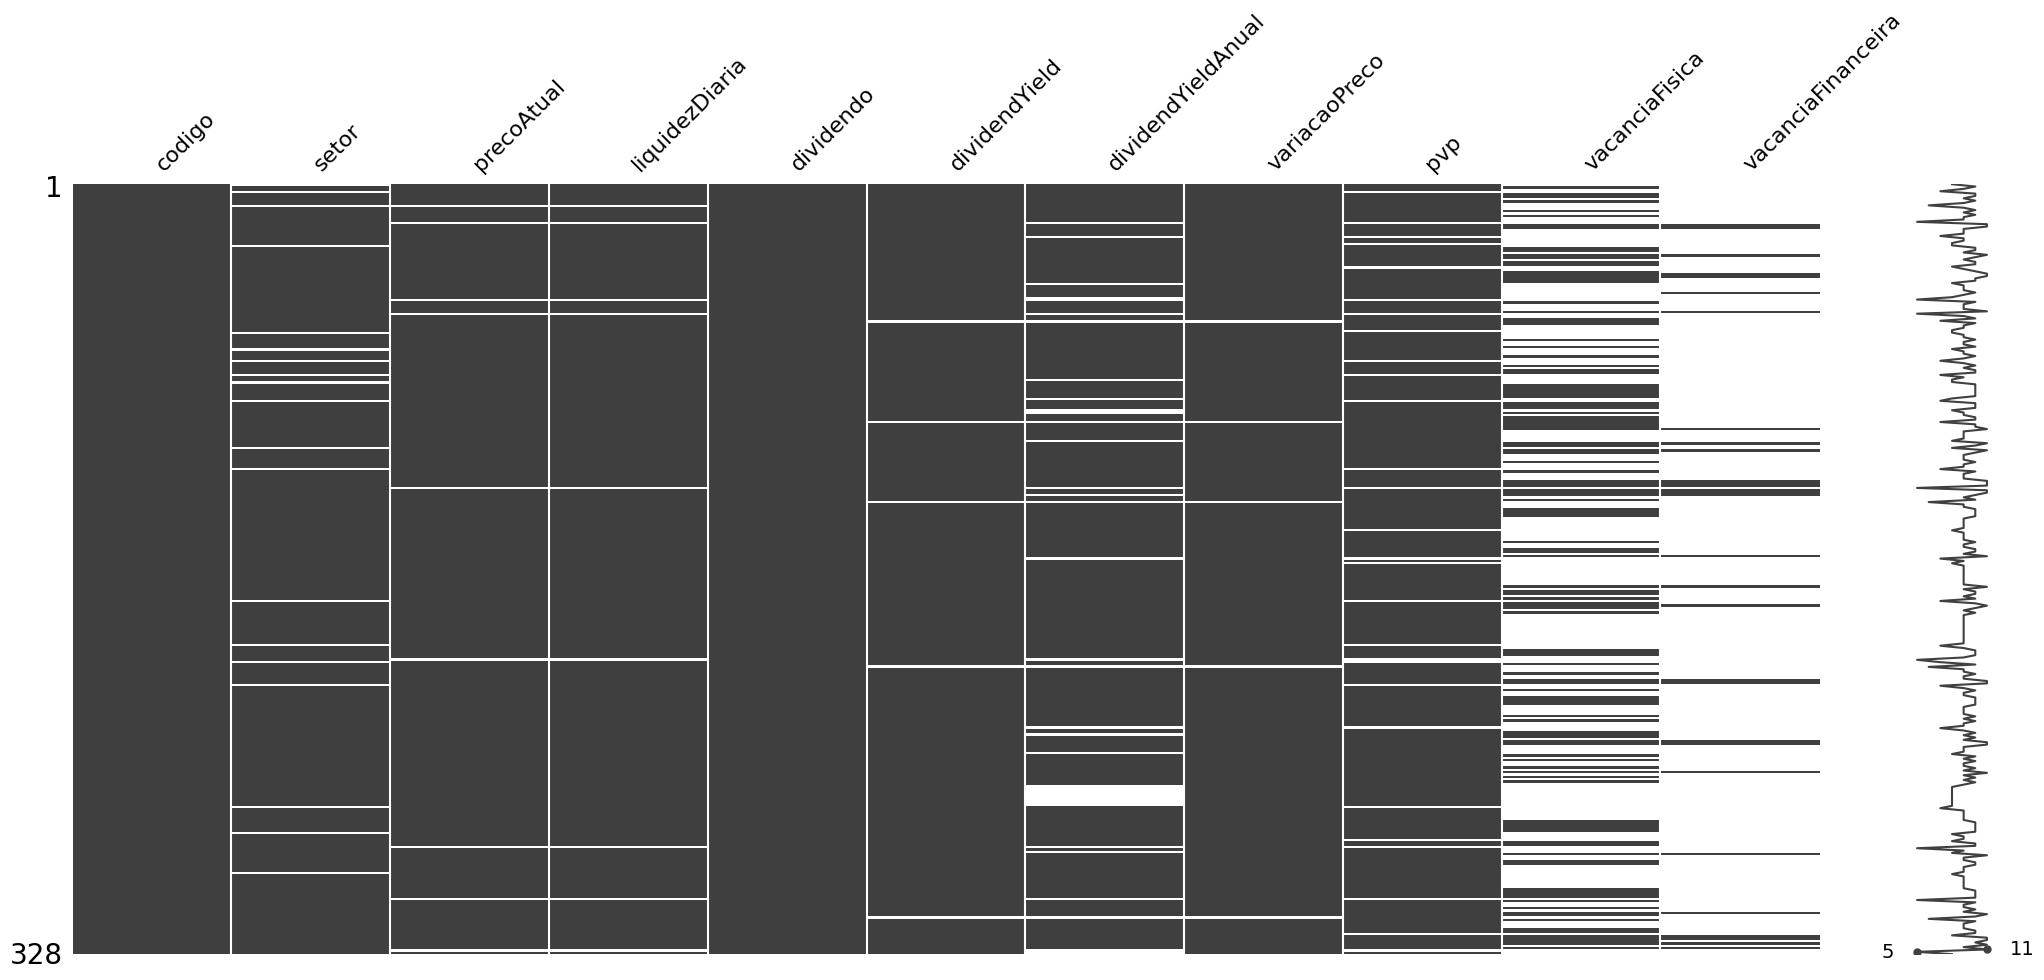

In [ ]:
msno.matrix(dados)

<Axes: >

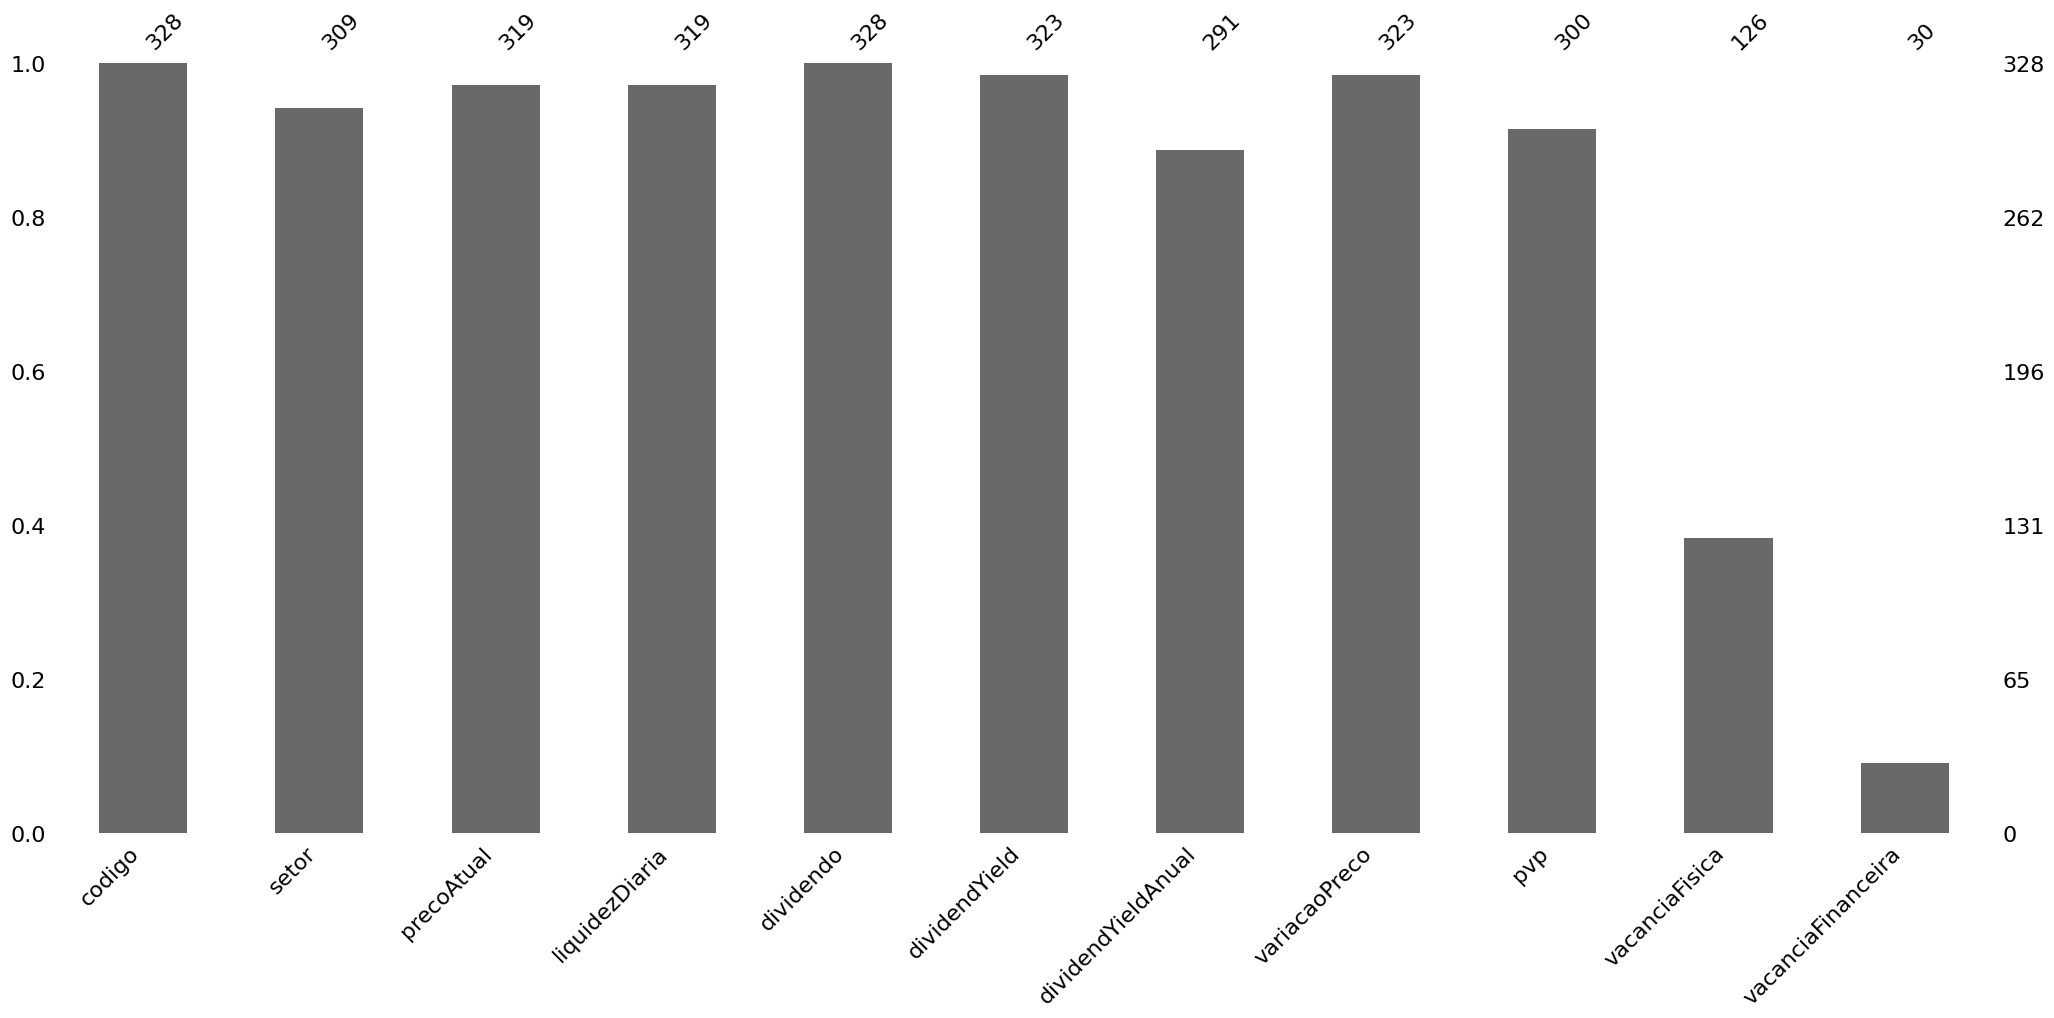

In [ ]:
msno.bar(dados)

In [ ]:
px.box(dados.dividendo)

In [ ]:
print(dados['dividendo'].median)


<bound method NDFrame._add_numeric_operations.<locals>.median of 0      R$ 0,13
1      R$ 0,50
2      R$ 1,06
3      R$ 0,18
4      R$ 0,75
        ...   
323    R$ 0,10
324    R$ 0,08
325    R$ 0,00
326    R$ 0,63
327    R$ 1,05
Name: dividendo, Length: 328, dtype: object>


In [ ]:
# Calcula os Outliers Da Base de Dados, Caso Exista.

for column in columnNumerical:

  describe = dados[column].describe()

  q1 = describe["25%"]
  q3 = describe["75%"]
  iqr = q3 - q1

  inferior = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  # Exibe os Limites De Outliers por Coluna.
  
  print(f'Limites Da Coluna {column}:')
  print(f"-Limite inferior: {inferior:.2f}")
  print(f"-Limite superior: {upper:.2f}")
  print()

NameError: name 'columnNumerical' is not defined